# Tarea - Ajuste de curvas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

---
### Problema 1

Los siguientes datos representan el costo en dólares de la electricidad según Western Electricity Coordinating Council desde el 2014 (y su pronóstico para el 2040)

Tomado de:
https://www.quandl.com/data/EIA/AEO_2016_REF_NO_CPP_PRCE_NA_COMM_NA_ELC_NA_WECCRKS_NCNTPKWH_A-Electricity-End-Use-Prices-Commercial-Western-Electricity-Coordinating-Council-Rockies-No-CPP-AEO2016

In [3]:
# Datos extraidos de la página de quandl
data = np.array([10.051101,  9.259127,  9.444813,  9.557723,  9.977324, 10.298326,
       10.447217, 10.550506, 10.590784, 10.657418, 10.743085, 10.831965,
       10.988435, 11.153055, 11.313326, 11.557165, 11.860136, 12.122511,
       12.356448, 12.611391, 12.814569, 13.111372, 13.357134, 13.559012,
       13.85861 , 14.135924, 14.436149])

1. Ajuste estos datos a polinomios de grado 1 hasta 3 (los datos en $x$ corresponden a los años de 2014 a 2040, sin embargo son valores muy grandes para elevarlos a una potencia, use una representación para estos años, por ejemplo $2014 \rightarrow 0$ y $2040\rightarrow 26$).

2. Muestre las tres curvas ajustadas junto a los datos de los costos en un solo gráfico

In [54]:
i = np.arange(27)

df= pd.DataFrame(index=i, columns=["Año", "Costo Electricidad"])

df["Año"] = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27]
df["Costo Electricidad"] = [10.051101,  9.259127,  9.444813,  9.557723,  9.977324, 10.298326,
       10.447217, 10.550506, 10.590784, 10.657418, 10.743085, 10.831965,
       10.988435, 11.153055, 11.313326, 11.557165, 11.860136, 12.122511,
       12.356448, 12.611391, 12.814569, 13.111372, 13.357134, 13.559012,
       13.85861 , 14.135924, 14.436149]
df.head(5)

,Año,Costo Electricidad
0,1,10.051101
1,2,9.259127
2,3,9.444813
3,4,9.557723
4,5,9.977324


In [55]:
df["Costo Electricidad"].min()

9.259127

In [56]:
df["Costo Electricidad"].max()

14.436149

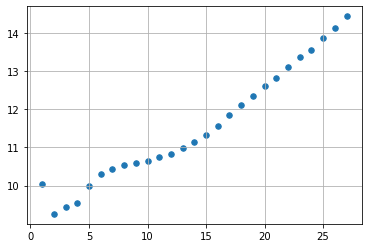

In [57]:
x = df["Año"]
y = df["Costo Electricidad"]
plt.figure()
plt.scatter(x, y, s=30)
plt.grid()

In [58]:
import scipy.optimize as opt

def funcion_de_costo_1(theta, x, y) :
    prediccion = theta[0] + theta[1]*x
    error = y - prediccion
    error_2 = error**2
    return np.sum(error_2)

theta_inicial_1 = np.random.rand(2)
sol = opt.minimize(funcion_de_costo_1,
                   theta_inicial_1,
                   args=(x, y))
costo_1 = sol.fun
resultados_1 = sol.x
sol

      fun: 2.370488951815276
 hess_inv: array([[ 0.07834758, -0.0042735 ],
       [-0.0042735 ,  0.00030525]])
      jac: array([-9.83476639e-07,  1.19209290e-07])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([8.92900574, 0.18667056])

In [59]:
def funcion_de_costo_2(theta, x, y) :
    prediccion = theta[0] + theta[1]*x + theta[2]*x**2
    error = y - prediccion
    error_2 = error**2
    return np.sum(error_2)

theta_inicial_2 = np.random.rand(3)
sol = opt.minimize(funcion_de_costo_2,
                   theta_inicial_2,
                   args=(x, y))
costo_2 = sol.fun
resultados_2 = sol.x
sol

      fun: 0.8443845212957041
 hess_inv: array([[ 1.94017064e-01, -2.82051238e-02,  8.54700696e-04],
       [-2.82051238e-02,  5.25661994e-03, -1.76834628e-04],
       [ 8.54700696e-04, -1.76834628e-04,  6.31552236e-06]])
      jac: array([7.45058060e-09, 7.45058060e-09, 2.23517418e-08])
  message: 'Optimization terminated successfully.'
     nfev: 48
      nit: 7
     njev: 12
   status: 0
  success: True
        x: array([9.52314625e+00, 6.37449459e-02, 4.39020022e-03])

In [60]:
def funcion_de_costo_3(theta, x, y) :
    prediccion = theta[0] + theta[1]*x + theta[2]*x**2 + theta[3]*x**3
    error = y - prediccion
    error_2 = error**2
    return np.sum(error_2)

theta_inicial_3 = np.random.rand(4)
sol = opt.minimize(funcion_de_costo_3,
                   theta_inicial_3,
                   args=(x, y))
costo_3 = sol.fun
resultados_3 = sol.x
sol

      fun: 0.8404288966464913
 hess_inv: array([[ 3.96437667e-01, -1.07810754e-01,  7.83473999e-03,
        -1.66191469e-04],
       [-1.07810754e-01,  3.65629800e-02, -2.92186116e-03,
         6.53577889e-05],
       [ 7.83473999e-03, -2.92186116e-03,  2.47006871e-04,
        -5.73074739e-06],
       [-1.66191469e-04,  6.53577889e-05, -5.73074739e-06,
         1.36446388e-07]])
      jac: array([-7.48185068e-03, -5.09165227e-04, -3.14191937e-01, -9.79337193e+00])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 292
      nit: 6
     njev: 56
   status: 2
  success: False
        x: array([9.48318030e+00, 7.90553424e-02, 3.06259508e-03, 3.14122893e-05])

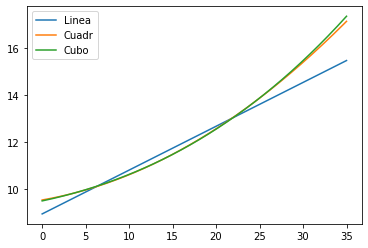

In [61]:
xn = np.linspace(0, 35, 200)
yn1 = resultados_1[0] + resultados_1[1]*xn
yn2 = resultados_2[0] + resultados_2[1]*xn + resultados_2[2]*xn**2
yn3 = resultados_3[0] + resultados_3[1]*xn + resultados_3[2]*xn**2 + resultados_3[3]*xn**3

import matplotlib.pyplot as plt
plt.figure()
#plt.scatter(x, y, s=5)
plt.plot(xn, yn1, label="Linea")
plt.plot(xn, yn2, label="Cuadr")
plt.plot(xn, yn3, label="Cubo")
plt.legend(loc="best")

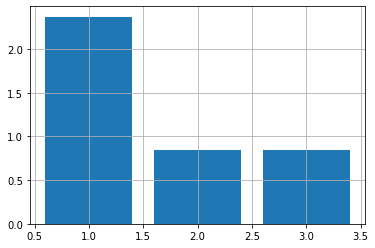

In [62]:
plt.figure()
plt.bar([1, 2, 3], [costo_1, costo_2, costo_3])
plt.grid()

In [64]:
x2040 = 2040 - 2014

pred1 = resultados_1[0] + resultados_1[1]*x2040
pred2 = resultados_2[0] + resultados_2[1]*x2040 + resultados_2[2]*x2040**2
pred3 = resultados_3[0] + resultados_3[1]*x2040 + resultados_3[2]*x2040**2 + resultados_3[3]*x2040**3

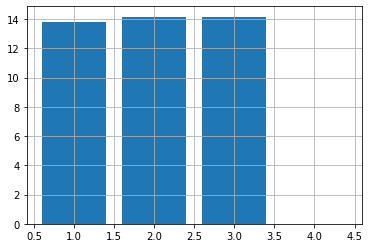

In [66]:
plt.figure()
plt.bar([1, 2, 3, 4], [pred1, pred2, pred3, 0])
plt.grid()

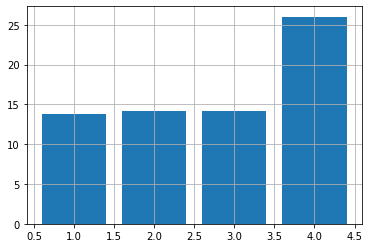

In [67]:
plt.figure()
plt.bar([1, 2, 3, 4], [pred1, pred2, pred3, 26])
plt.grid()

In [68]:
data

,Year,Poblacion,Nacimientos,Decesos
0,1950,28296,1174947,418430
1,1951,29110,1183788,458238
2,1952,29980,1195209,408823
3,1953,30904,1261775,446127
4,1954,31880,1339837,378752
...,...,...,...,...
61,2011,115683,2586287,590693
62,2012,117054,2498880,602354
63,2013,118395,2478889,623599
64,2014,119713,2463420,633641


___
### Problema 2

El archivo `population_data.csv` contiene información histórica anual de México relativa a la población, nacimientos y muertes desde el año 1950 hasta el año 2015. La primer columna corresponde a los años, la segunda a la población, la tercera a los nacimientos y la última a los decesos.

Tomado de: https://en.wikipedia.org/wiki/Demographics_of_Mexico.

Importe estos datos usando la función `read_csv` del paquete `pandas`

1. Usando los años como variable independiente $x$ y la población como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

    * Mostrar en un solo gráfico los datos de población contra los años, y los polinomios ajustados.

    * Graficar el error cuadrático acumulado contra el número de términos.

2. Repetir el punto 1 usando los nacimientos como variable dependiente $y$. Grafique las curvas ajustadas junto con los datos de nacimientos. Vea en un gráfico el error acumulado.

In [29]:
data = pd.read_csv('population_data.csv')

In [39]:
data.head(5)

,Year,Poblacion,Nacimientos,Decesos
0,1950,28296,1174947,418430
1,1951,29110,1183788,458238
2,1952,29980,1195209,408823
3,1953,30904,1261775,446127
4,1954,31880,1339837,378752


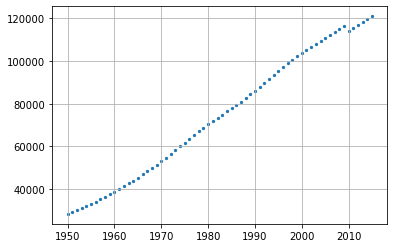

In [35]:
x = data["Year"] - 1950
y = data["Poblacion"] - 28296
plt.figure()
plt.scatter(x + 1950, y + 28296, s=5)
plt.grid()


In [36]:
import scipy.optimize as opt

def funcion_de_costo_1(theta, x, y) :
    prediccion = theta[0] + theta[1]*x
    error = y - prediccion
    error_2 = error**2
    return np.sum(error_2)

theta_inicial_1 = np.random.rand(2)
sol = opt.minimize(funcion_de_costo_1,
                   theta_inicial_1,
                   args=(x, y))
costo_1 = sol.fun
resultados_1 = sol.x
sol

      fun: 212137169.54509786
 hess_inv: array([[ 2.96287525e-02, -6.78546012e-04],
       [-6.78546012e-04,  2.08786717e-05]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 36
      nit: 6
     njev: 12
   status: 0
  success: True
        x: array([-4157.99113749,  1543.97356421])

In [37]:
def funcion_de_costo_2(theta, x, y) :
    prediccion = theta[0] + theta[1]*x + theta[2]*x**2
    error = y - prediccion
    error_2 = error**2
    return np.sum(error_2)

theta_inicial_2 = np.random.rand(3)
sol = opt.minimize(funcion_de_costo_2,
                   theta_inicial_2,
                   args=(x, y))
costo_2 = sol.fun
resultados_2 = sol.x
sol

      fun: 210941621.44692484
 hess_inv: array([[ 6.41713598e-02, -3.91732221e-03,  4.98313368e-05],
       [-3.91732221e-03,  3.24589659e-04, -4.67295124e-06],
       [ 4.98313368e-05, -4.67295124e-06,  7.18987690e-08]])
      jac: array([  0.,   0., -66.])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 135
      nit: 7
     njev: 31
   status: 2
  success: False
        x: array([-3.87039872e+03,  1.51701283e+03,  4.14775354e-01])

In [38]:
def funcion_de_costo_3(theta, x, y) :
    prediccion = theta[0] + theta[1]*x + theta[2]*x**2 + theta[3]*x**3
    error = y - prediccion
    error_2 = error**2
    return np.sum(error_2)

theta_inicial_3 = np.random.rand(4)
sol = opt.minimize(funcion_de_costo_3,
                   theta_inicial_3,
                   args=(x, y))
costo_3 = sol.fun
resultados_3 = sol.x
sol

      fun: 25240442.640158813
 hess_inv: array([[ 1.09222580e-01, -1.26030523e-02,  3.86293467e-04,
        -3.44820780e-06],
       [-1.26030523e-02,  1.98785044e-03, -6.90189342e-05,
         6.59181203e-07],
       [ 3.86293467e-04, -6.90189342e-05,  2.56080469e-06,
        -2.54968474e-08],
       [-3.44820780e-06,  6.59181203e-07, -2.54968474e-08,
         2.61201878e-10]])
      jac: array([ 0. ,  0. ,  1. , 60.5])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 177
      nit: 6
     njev: 34
   status: 2
  success: False
        x: array([ 1.81751849e+02,  7.39079535e+02,  3.05648635e+01, -3.09231806e-01])

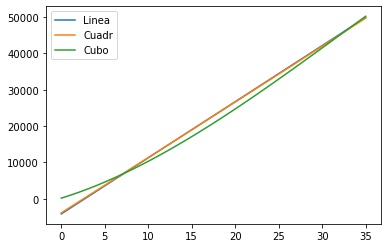

In [40]:
xn = np.linspace(0, 35, 200)
yn1 = resultados_1[0] + resultados_1[1]*xn
yn2 = resultados_2[0] + resultados_2[1]*xn + resultados_2[2]*xn**2
yn3 = resultados_3[0] + resultados_3[1]*xn + resultados_3[2]*xn**2 + resultados_3[3]*xn**3

import matplotlib.pyplot as plt
plt.figure()
#plt.scatter(x, y, s=5)
plt.plot(xn, yn1, label="Linea")
plt.plot(xn, yn2, label="Cuadr")
plt.plot(xn, yn3, label="Cubo")
plt.legend(loc="best")

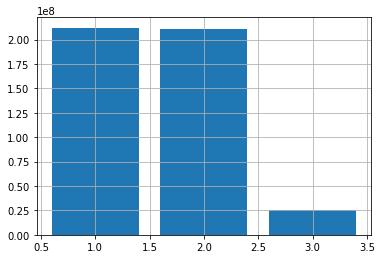

In [41]:
plt.figure()
plt.bar([1, 2, 3], [costo_1, costo_2, costo_3])
plt.grid()

In [46]:
x2015 = 2015 - 1950

pred1 = resultados_1[0] + resultados_1[1]*x2015
pred2 = resultados_2[0] + resultados_2[1]*x2015 + resultados_2[2]*x2015**2
pred3 = resultados_3[0] + resultados_3[1]*x2015 + resultados_3[2]*x2015**2 + resultados_3[3]*x2015**3

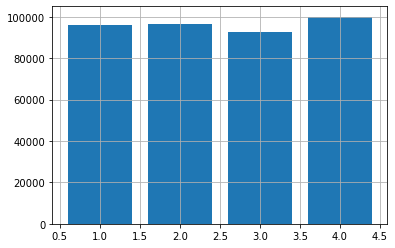

In [50]:
plt.figure()
plt.bar([1, 2, 3, 4], [pred1, pred2, pred3, 100000])
plt.grid()

In [51]:
pred2

96487.8614019851

In [52]:
data

,Year,Poblacion,Nacimientos,Decesos
0,1950,28296,1174947,418430
1,1951,29110,1183788,458238
2,1952,29980,1195209,408823
3,1953,30904,1261775,446127
4,1954,31880,1339837,378752
...,...,...,...,...
61,2011,115683,2586287,590693
62,2012,117054,2498880,602354
63,2013,118395,2478889,623599
64,2014,119713,2463420,633641
